### Inter-group figures

In [1]:
# General imports
import os
import sys
import json
import glob
import ipdb
import pandas as pd
import numpy as np
deb = ipdb.set_trace

In [2]:
# Inputs
data_dir = '/home/mszinte/disks/meso_S/data'
code_dir = '/home/mszinte/disks/meso_H/projects'
amblyo_dir = 'amblyo_prf'
control_dir = 'RetinoMaps'

# Personal import
sys.path.append("{}/{}/analysis_code/utils".format(code_dir, amblyo_dir))
from plot_utils import *

# load amblyo settings
with open('{}/{}/analysis_code/settings.json'.format(code_dir, amblyo_dir)) as f:
    json_s = f.read()
    amblyo_analysis_info = json.loads(json_s)
amblyo_subjects = amblyo_analysis_info['subjects_patient']
strab_subjects = amblyo_analysis_info['subjects_strab']
aniso_subjects = amblyo_analysis_info['subjects_aniso']
mixed_subjects = amblyo_analysis_info['subjects_mixed']
formats = amblyo_analysis_info['formats']
foveal_bound = amblyo_analysis_info['foveal_bound']
rois = amblyo_analysis_info['rois']

# load control settings
with open('{}/{}/analysis_code/settings.json'.format(code_dir, control_dir)) as f:
    json_s = f.read()
    control_analysis_info = json.loads(json_s)
control_subjects = control_analysis_info['subjects']

# define analysis settings
datasets = ['amblyo', 'control']
ecc_categories = ['foveal', 'peripheral']

# Figure settings
colormap_dict = {'V1': (243, 231, 155),
                 'V2': (250, 196, 132),
                 'V3': (248, 160, 126),
                 'V3AB': (235, 127, 134),
                 'LO': (150, 0, 90), 
                 'VO': (0, 0, 200),
                 'hMT+': (0, 25, 255),
                 'iIPS': (0, 152, 255),
                 'sIPS': (44, 255, 150),
                }
roi_colors = ['rgb({},{},{})'.format(*rgb) for rgb in colormap_dict.values()]
plot_groups = [['V1', 'V2', 'V3'], ['V3AB', 'LO', 'VO'], ['hMT+', 'iIPS', 'sIPS']]
num_ecc_size_bins = 6
num_ecc_pcm_bins = 6
num_polar_angle_bins = 9
max_ecc = 15
fig_width = 1080

#### PRF eccentricity category (foveal/peripheral)

In [3]:
# Get data of all subjects and combined them
for format_ in formats:

    # Define figure directory
    fig_dir = '{}/{}/derivatives/pp_data/inter-group/{}/figures'.format(
        data_dir, amblyo_dir, format_)
    os.makedirs(fig_dir, exist_ok=True)

    # TSV loading 
    tsv_dir_intergroup = '{}/{}/derivatives/pp_data/inter-group/{}/tsv'.format(data_dir, amblyo_dir, format_)
    
    tsv_subject_type_fn = "{}/inter-group_prf_ecc_cat_subject_type.tsv".format(tsv_dir_intergroup)
    df_subject_type = pd.read_table(tsv_subject_type_fn, sep="\t")

    tsv_amblyo_type_fn = "{}/inter-group_prf_ecc_cat_amblyo_type.tsv".format(tsv_dir_intergroup)
    df_amblyo_type = pd.read_table(tsv_subject_type_fn, sep="\t")

    ffff
    # pRF eccentricity category
    for comp_group in ['patient', 'aniso', 'strab', 'mixed']:
        if comp_group == 'patient': df_ecc_cat = df_subject_type
        else: df_ecc_cat = df_amblyo_type
            
        fig = pRF_ecc_cat(df_ecc_cat=df_ecc_cat, fig_width=fig_width, fig_height=400, 
                          roi_colors=roi_colors, comp_group=comp_group)
        fig_fn = "{}/inter-group_{}_prf_ecc_cat.pdf".format(fig_dir, comp_group)
        print('Saving pdf: {}'.format(fig_fn))
        fig.write_image(fig_fn)
        

    # pRF eccentricity category difference
    for comp_group in ['patient', 'aniso', 'strab', 'mixed']:
        if comp_group == 'patient': df_ecc_cat = df_subject_type
        else: df_ecc_cat = df_amblyo_type
            
        fig = pRF_ecc_cat_diff(df_ecc_cat=df_ecc_cat, fig_width=fig_width, fig_height=400, 
                               roi_colors=roi_colors, comp_group=comp_group)
        fig_fn = "{}/inter-group_{}_prf_ecc_cat_diff.pdf".format(fig_dir, comp_group)
        print('Saving pdf: {}'.format(fig_fn))
        fig.write_image(fig_fn)
        
# Define permission cmd
print('Changing files permissions in {}/{}'.format(data_dir, amblyo_dir))
os.system("chmod -Rf 771 {}/{}".format(data_dir, amblyo_dir))
os.system("chgrp -Rf {} {}/{}".format(group, data_dir, amblyo_dir))

NameError: name 'ffff' is not defined

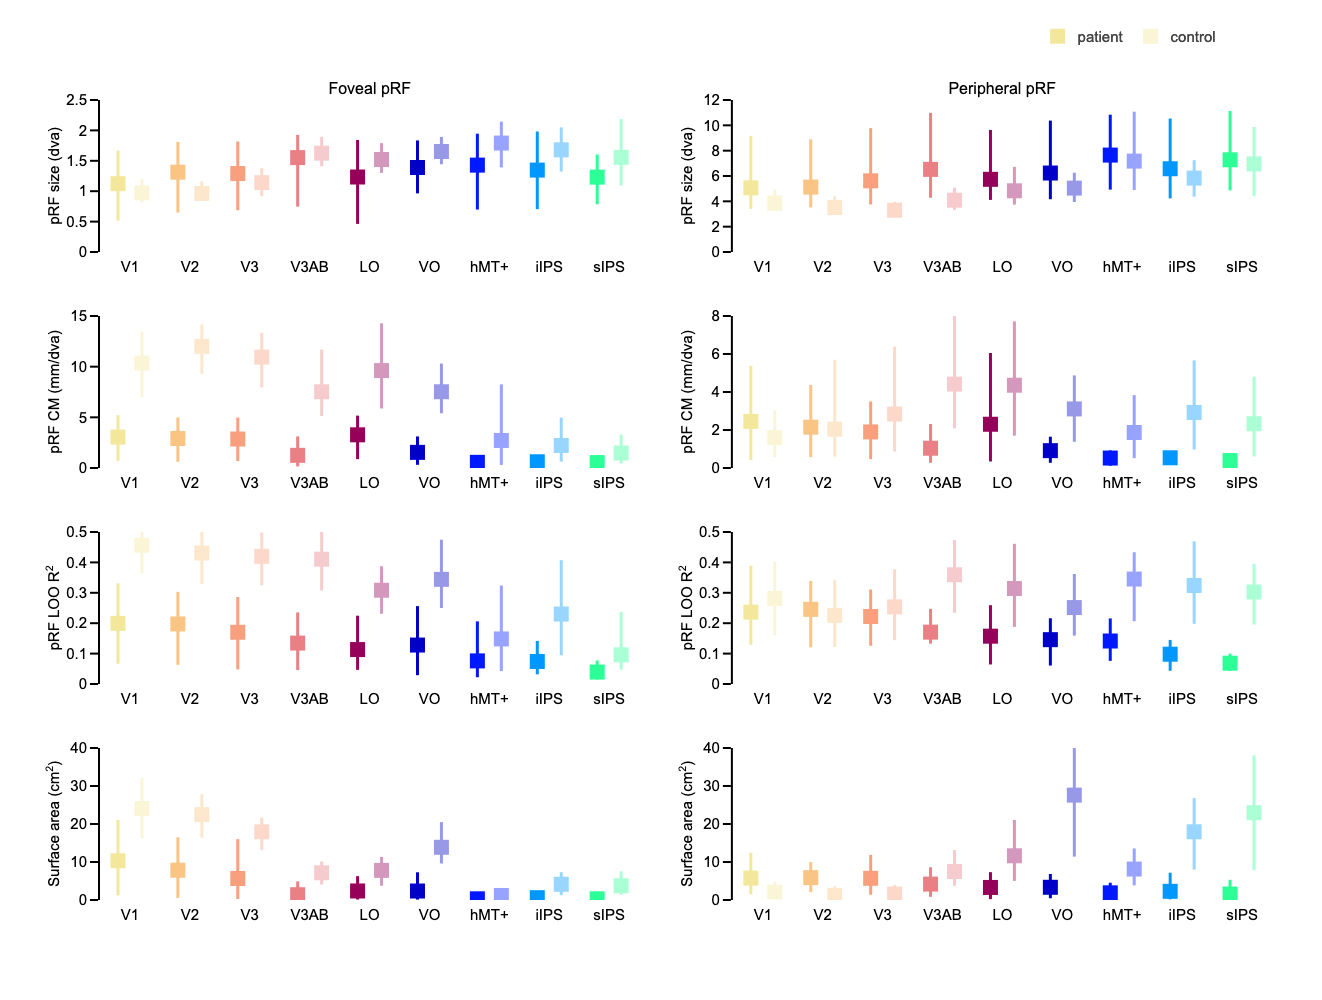

In [50]:
# def prf_ecc_cat_plot(df_ecc_cat, fig_width, fig_height, rois, roi_colors, comp_group):
#     """
#     Make eccentricity category plots

#     Parameters
#     ----------
#     df_params_avg : dataframe
#     fig_width : figure width in pixels
#     fig_height : figure height in pixels
#     rois : list of rois
#     roi_colors : list of rgb colors for plotly
#     comp_group : group of comparison (e.g. 'patient')
    
#     Returns
#     -------
#     fig : eccentricity category plot
#     """

# to delete
df_ecc_cat = df_subject_type
fig_width = 1080
fig_height = 1000
rois = rois
roi_colors = roi_colors
ecc_categories = ecc_categories
comp_group = 'patient'
comp_col = 'subject_type'

# General figure settings
template_specs = dict(axes_color="rgba(0, 0, 0, 1)",
                      axes_width=2,
                      axes_font_size=15,
                      bg_col="rgba(255, 255, 255, 1)",
                      font='Arial',
                      title_font_size=15,
                      plot_width=1.5)

# General figure settings
fig_template = plotly_template(template_specs)

rows, cols = 4,2
fig = make_subplots(rows=rows, 
                    cols=cols, 
                    print_grid=False, 
                    vertical_spacing=0.08, 
                    horizontal_spacing=0.08,
                    subplot_titles=("Foveal pRF", "Peripheral pRF", "", ""),
                   )

type_results = ['prf_size', 'pcm', 'prf_loo_r2', 'vert_area']
for j, roi in enumerate(rois):    
    for i, type_res in enumerate(type_results, 1):
        
        if type_res == 'vert_area':
            y_comp_col = '{}_sum_mean'.format(type_res)
            ci_down_col = '{}_sum_ci_down'.format(type_res)
            ci_up_col = '{}_sum_ci_up'.format(type_res)
        else:
            y_comp_col = '{}_weighted_avg_mean'.format(type_res)
            ci_down_col = '{}_weighted_avg_ci_down'.format(type_res)
            ci_up_col = '{}_weighted_avg_ci_up'.format(type_res)
        
        for k, ecc_cat in enumerate(ecc_categories, 1):
    
                
            for comp_type in [comp_group, 'control']:
                if comp_type == comp_group:
                    offsetgroup=-1
                    opacity=1
                elif comp_type == 'control':
                    offsetgroup=+1
                    opacity=0.4


                if (j+i+k)==2: showlegend=True
                else: showlegend=False
                
                y_comp = df_ecc_cat.loc[(df_ecc_cat.roi==roi) & 
                                        (df_ecc_cat.ecc_category==ecc_cat) & 
                                        (df_ecc_cat.subject_type==comp_type)][y_comp_col]
                ci_down_comp = df_ecc_cat.loc[(df_ecc_cat.roi==roi) & 
                                              (df_ecc_cat.ecc_category==ecc_cat) & 
                                              (df_ecc_cat.subject_type==comp_type)][ci_down_col]
                ci_up_comp = df_ecc_cat.loc[(df_ecc_cat.roi==roi) & 
                                            (df_ecc_cat.ecc_category==ecc_cat) & 
                                            (df_ecc_cat.subject_type==comp_type)][ci_up_col]
                
                fig.add_trace(go.Scatter(x=[roi],
                                         y=tuple(y_comp),
                                         name=comp_type,
                                         opacity=opacity,
                                         mode='markers', 
                                         marker=dict(symbol="square",
                                                     color=roi_colors[j],
                                                     size=12, 
                                                     line=dict(color=roi_colors[j], 
                                                               width=3)),
                                         legendgroup=comp_type,
                                         offsetgroup=offsetgroup,
                                         error_y=dict(type='data', 
                                                      array=[ci_up_comp - y_comp], 
                                                      arrayminus=[y_comp - ci_down_comp],
                                                      visible=True, 
                                                      thickness=3,
                                                      width=0, 
                                                      color=roi_colors[j]),
                                         showlegend=showlegend), 
                              row=i, col=k)


fig.update_yaxes(showline=True, range=[0, 2.5], nticks=7, title_text='pRF size (dva)', row=1, col=1)
fig.update_yaxes(showline=True, range=[0, 12], nticks=7, title_text='pRF size (dva)', row=1, col=2)
fig.update_yaxes(showline=True, range=[0, 15], nticks=4, title_text='pRF CM (mm/dva)', row=2, col=1)
fig.update_yaxes(showline=True, range=[0, 8], nticks=5, title_text='pRF CM (mm/dva)', row=2, col=2)
fig.update_yaxes(showline=True, range=[0, 0.5], nticks=6, title_text='pRF LOO R<sup>2</sup>', row=3, col=1)
fig.update_yaxes(showline=True, range=[0, 0.5], nticks=6, title_text='pRF LOO R<sup>2</sup>', row=3, col=2)
fig.update_yaxes(showline=True, range=[0, 40], nticks=6, title_text='Surface area (cm<sup>2</sup>)', row=4, col=1)
fig.update_yaxes(showline=True, range=[0, 40], nticks=6, title_text='Surface area (cm<sup>2</sup>)', row=4, col=2)

fig.update_xaxes(showline=True, ticklen=0, linecolor=('rgba(255,255,255,0)'))

fig.update_layout(scattermode='group')
fig.update_layout(legend=dict(x=0.8))
fig.update_layout(height=fig_height, 
                  width=fig_width, 
                  title_xanchor="left",
                  legend=dict(orientation="h", 
                              font_family=template_specs['font'],
                              font_size=template_specs['axes_font_size'],
                              y=1.1, 
                              yanchor='top', 
                              xanchor='left', 
                              traceorder='normal', 
                              itemwidth=30), 
                  template=fig_template,
                  margin_l=100,
                  margin_r=50,
                  margin_t=100, 
                  margin_b=100)

fig.show()